# 🏋️ Combine Athlete Data Analysis Notebook
**Goal:** Merge four combine test datasets into one M.O.A.T. (Mother Of All Tables), analyze relationships between athletic performance variables, explore noise, correlations, and statistical significance.

**Tests Included:**
- Pro Agility
- Isometric Mid-Thigh Pull
- 40 Yard Dash
- Counter Movement Jump

### Steps in this Notebook:
1. Load and inspect data
2. Clean athlete names for consistency
3. Merge datasets into M.O.A.T.
4. Explore missing data
5. Visualize using seaborn pairplot
6. Compute correlations and statistical significance
7. Interpret results academically

In [13]:
# ==============================
# STEP 1 — Setup & Imports
# ==============================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.width", 200)
sns.set_context("notebook")
%matplotlib inline

### 🔍 Explanation
We import the Python libraries needed for:
- **Pandas** → working with dataframes
- **Seaborn/Matplotlib** → visualizations
- **SciPy** → statistical analysis

In [14]:
# ==============================
# STEP 2 — Load CSV Files Safely
# ==============================

paths = {
    "ProAgility": "/home/mlahkim15/ve/Combine/Combine Data - ProAgility.csv",
    "IsometricMidThighPull": "/home/mlahkim15/ve/Combine/Combine Data - IsometricMidThighPull.csv",
    "FourtyYardDash": "/home/mlahkim15/ve/Combine/Combine Data - FourtyYardDash.csv",
    "CounterMovementJump": "/home/mlahkim15/ve/Combine/Combine Data - CounterMovementJump.csv"
}

def load_csv(path):
    if not os.path.exists(path):
        print(f"❌ File not found: {path}")
        return None
    df = pd.read_csv(path)
    print(f"✔ Loaded {path} — shape: {df.shape}")
    return df

dfs = {k: load_csv(p) for k, p in paths.items()}

✔ Loaded /home/mlahkim15/ve/Combine/Combine Data - ProAgility.csv — shape: (73, 8)
✔ Loaded /home/mlahkim15/ve/Combine/Combine Data - IsometricMidThighPull.csv — shape: (72, 8)
✔ Loaded /home/mlahkim15/ve/Combine/Combine Data - FourtyYardDash.csv — shape: (90, 8)
✔ Loaded /home/mlahkim15/ve/Combine/Combine Data - CounterMovementJump.csv — shape: (75, 8)


### 📝 Analysis
This code loads all four combine datasets and prints their dimensions (rows = athletes, columns = metrics).

If a dataset is not found, you will see a ❌ message, and the corresponding dataframe will be skipped.

In [15]:
# ==============================
# STEP 3 — Clean & Standardize Athlete Names
# ==============================

def clean_names(df):
    # Auto-detect a name column
    name_cols = [c for c in df.columns if "name" in c.lower() or "athlete" in c.lower()]
    if not name_cols:
        print("❌ No name column found in:", list(df.columns))
        return df
    name_col = name_cols[0]
    print(f"✔ Using '{name_col}' as name column")
    
    df = df.copy()
    df[name_col] = (
        df[name_col]
        .astype(str)
        .str.strip()
        .str.replace(r"\s+", " ", regex=True)
        .str.title()
    )
    return df.rename(columns={name_col: "Name"})

# Apply to all datasets
for k, df in dfs.items():
    if df is not None:
        print(f"\nProcessing: {k}")
        dfs[k] = clean_names(df)


Processing: ProAgility
✔ Using 'name' as name column

Processing: IsometricMidThighPull
✔ Using 'name' as name column

Processing: FourtyYardDash
✔ Using 'name' as name column

Processing: CounterMovementJump
✔ Using 'name' as name column


### 📝 Analysis
We standardize athlete names so all datasets merge cleanly.
Without this cleaning, tiny inconsistencies like spacing or capitalization would cause duplicate entries.

This reduces **noise** in the dataset caused by messy data entry.

## 🧠 Build the M.O.A.T — Mother Of All Tables

In [20]:
# ==============================
# STEP 4 — Merge into M.O.A.T. (Tall Table PDF-Friendly)
# ==============================

# Step 1: Merge all dataframes with prefixed column names
moat = None
for k, df in dfs.items():
    if df is None:
        continue
    df_prefixed = df.copy()
    for col in df.columns:
        if col != "Name":
            df_prefixed = df_prefixed.rename(columns={col: f"{k}_{col}"})
    if moat is None:
        moat = df_prefixed
    else:
        moat = moat.merge(df_prefixed, on="Name", how="outer")

print("✅ M.O.A.T. created — shape:", moat.shape)

# Step 2: Convert wide M.O.A.T. to tall/stacked format for PDF readability
moat_tall = moat.melt(id_vars="Name", var_name="Variable", value_name="Value")

# Step 3: Optionally, split into blocks if too long (e.g., 50 rows per block)
block_size = 50
blocks = [moat_tall.iloc[i:i+block_size] for i in range(0, len(moat_tall), block_size)]

# Step 4: Display first block as example
display(blocks[0])


✅ M.O.A.T. created — shape: (93, 29)

✅ Tall-format M.O.A.T. (first block shown):


,Name,Variable,Value
0,Alpha Alpha Tango Yankee,ProAgility_sex,Women
1,Alpha Mike November Sierra,ProAgility_sex,Men
2,Alpha November Bravo November,ProAgility_sex,Women
3,Alpha November Mike Sierra,ProAgility_sex,Men
4,Alpha November Tango Romeo,ProAgility_sex,Women
5,"Average Elite Athlete, College",ProAgility_sex,NaN
6,Bravo Echo Romeo Echo,ProAgility_sex,Women
7,Bravo November Delta Yankee,ProAgility_sex,Men
8,Bravo November Whiskey November,ProAgility_sex,Men
9,Charlie Echo Echo November,ProAgility_sex,Men


### 📝 Analysis
The **M.O.A.T.** merges all athlete test results into one table.

- Uses an **outer join**, so all athletes are included even if they are missing results
- Each test column gets a prefix to prevent naming conflicts

This combined table helps us analyze relationships between different performance skills.

## 🕳 Check Missing Data


In [17]:
# ==============================
# STEP 5 — Check Missing Data
# ==============================

missing = moat.isnull().sum().sort_values(ascending=False)
print("Top 20 columns with missing values:")
display(missing.head(20))

Top 20 columns with missing values:


IsometricMidThighPull_hold out                          21
IsometricMidThighPull_sex                               21
IsometricMidThighPull_source                            21
IsometricMidThighPull_delta_total_average               21
IsometricMidThighPull_personal_average_newton_second    21
IsometricMidThighPull_absolute_impulse_newton_second    21
IsometricMidThighPull_movement                          21
ProAgility_movement                                     20
ProAgility_sex                                          20
ProAgility_hold out                                     20
ProAgility_source                                       20
ProAgility_delta_total_average                          20
ProAgility_agility_avg_time_seconds                     20
ProAgility_agility_total_time_seconds                   20
CounterMovementJump_sex                                 18
CounterMovementJump_source                              18
CounterMovementJump_delta_total_average                 

### 📝 Analysis
This shows which measurement categories have the most missing values.

Missing data introduces **variation (noise)** that weakens correlation accuracy and might indicate:
- Broken equipment
- Recording errors
- Skipped testing attempts

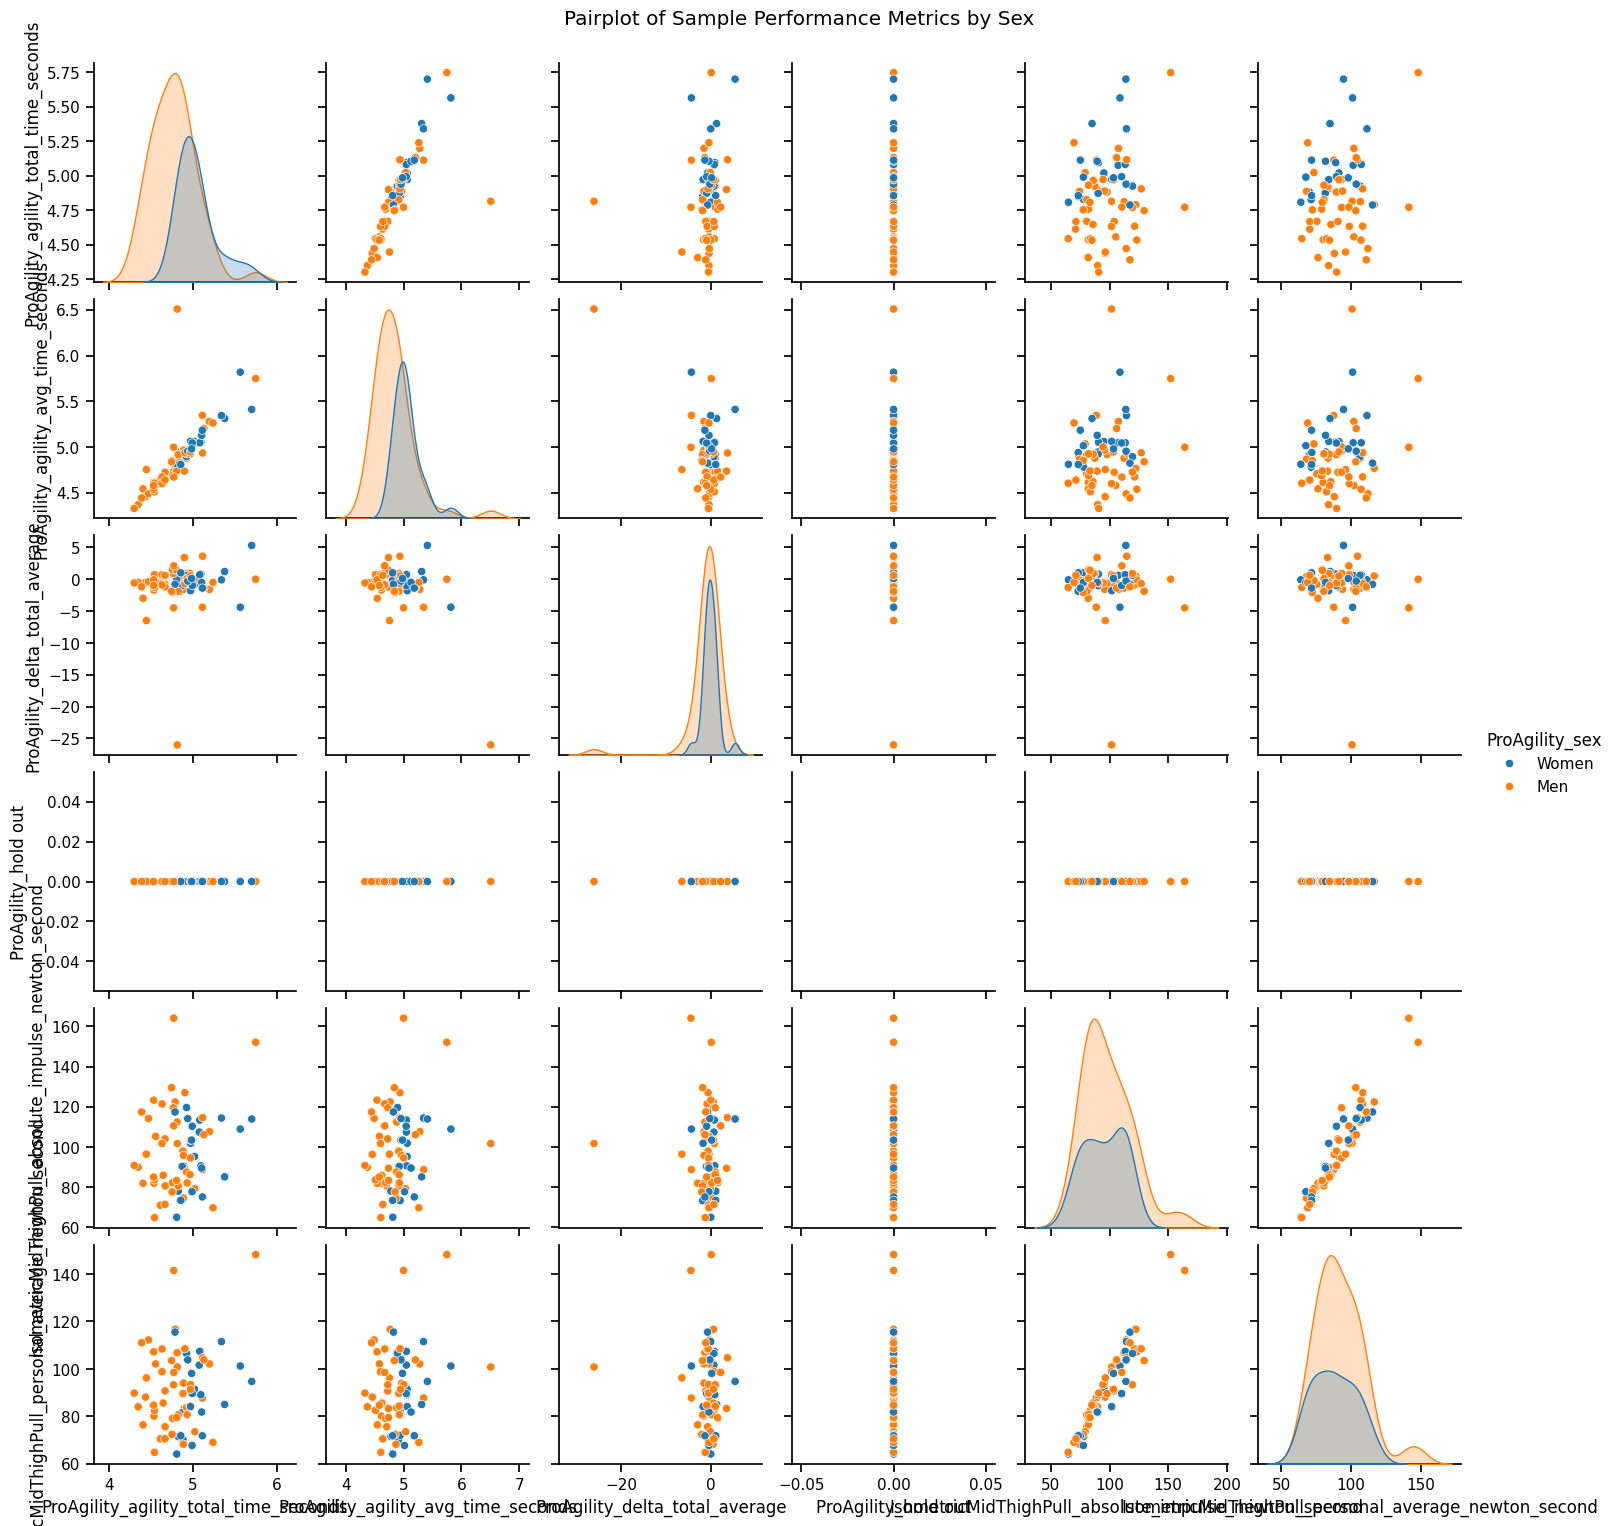

In [18]:
# ==============================
# STEP 6 — Exploratory Data Analysis with Pairplot (hue="Sex")
# ==============================

# Make sure Sex column exists
sex_col = [c for c in moat.columns if "sex" in c.lower()]
if len(sex_col) == 0:
    print("❌ No 'Sex' column found for hue")
else:
    sex_col = sex_col[0]
    
    numeric_cols = moat.select_dtypes(include=np.number).columns.tolist()
    sample_cols = numeric_cols[:6]  # limit for readability

    sns.pairplot(moat[sample_cols + [sex_col]].dropna(), hue=sex_col)
    plt.suptitle("Pairplot of Sample Performance Metrics by Sex", y=1.02)
    plt.show()

### 📝 Analysis
- Pairplots visualize relationships between test metrics  
- Using **hue="Sex"** allows comparison between male and female athletes  
- Patterns, trends, and outliers are easier to detect when grouping by sex

In [19]:
# ==============================
# STEP 7 — PDF-Friendly Correlation Summary (with short labels)
# ==============================

import warnings

# Step 1: Keep only numeric columns with variation
numeric_df = moat.select_dtypes(include=np.number)
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]

cols = numeric_df.columns
results = []

# Step 2: Compute upper-triangle correlations only
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        x = numeric_df[cols[i]]
        y = numeric_df[cols[j]]
        pair_df = pd.concat([x, y], axis=1).dropna()
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            corr, p_val = stats.pearsonr(pair_df[cols[i]], pair_df[cols[j]])
        
        # Truncate long names for PDF readability
        short_x = cols[i][:20] + "…" if len(cols[i]) > 20 else cols[i]
        short_y = cols[j][:20] + "…" if len(cols[j]) > 20 else cols[j]
        
        results.append({
            "Var 1": short_x,
            "Var 2": short_y,
            "Correlation": round(corr, 3),
            "P-Value": round(p_val, 4)
        })

# Step 3: Create DataFrame
corr_summary = pd.DataFrame(results)

# Step 4: Optional filter to show only meaningful correlations
corr_summary_filtered = corr_summary[corr_summary['Correlation'].abs() > 0.3]

# Step 5: Sort by absolute correlation
corr_summary_filtered = corr_summary_filtered.sort_values(by="Correlation", key=lambda x: x.abs(), ascending=False)

# Step 6: Display with legend/explanation
print("PDF-Friendly Correlation Table:")
print("Legend: '…' indicates truncated variable names for readability.")
display(corr_summary_filtered)


PDF-Friendly Correlation Table:
Legend: '…' indicates truncated variable names for readability.


,Var 1,Var 2,Correlation,P-Value
51,FourtyYardDash_fourt…,FourtyYardDash_fourt…,0.967,0.0
30,IsometricMidThighPul…,IsometricMidThighPul…,0.952,0.0
63,CounterMovementJump_…,CounterMovementJump_…,0.948,0.0
0,ProAgility_agility_t…,ProAgility_agility_a…,0.778,0.0
58,FourtyYardDash_fourt…,CounterMovementJump_…,-0.767,0.0
57,FourtyYardDash_fourt…,CounterMovementJump_…,-0.761,0.0
54,FourtyYardDash_fourt…,CounterMovementJump_…,-0.742,0.0
53,FourtyYardDash_fourt…,CounterMovementJump_…,-0.736,0.0
6,ProAgility_agility_t…,FourtyYardDash_fourt…,0.715,0.0
5,ProAgility_agility_t…,FourtyYardDash_fourt…,0.695,0.0


### 📝 Analysis
- **Correlation matrix** shows how strongly each pair of metrics relates  
- **P-values** indicate whether correlations are statistically significant (p < 0.05)  
- Together, they reveal meaningful patterns: e.g., if speed correlates with jump height or agility